<a href="https://colab.research.google.com/github/mdsiam135/research/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Yearbook of Agricultural Statistics/train1.csv")

In [3]:
labels = ['very low', 'low', 'medium', 'high', 'very high']
df['Production_Label'], bin_edges = pd.qcut(df['Production (M.Ton)'], q=5, labels=labels, retbins=True)

In [4]:
# Show the bin ranges
print("Ranges for Production Categories:")
for i in range(len(bin_edges) - 1):
    print(f"{labels[i]}: {bin_edges[i]:.2f} to {bin_edges[i + 1]:.2f}")

Ranges for Production Categories:
very low: 0.00 to 545.38
low: 545.38 to 1452.00
medium: 1452.00 to 3050.00
high: 3050.00 to 6447.40
very high: 6447.40 to 544979.54


In [5]:
# Show value counts
print("\nCounts per Production Category:\n", df['Production_Label'].value_counts())


Counts per Production Category:
 Production_Label
low          1025
very low     1024
medium       1024
very high    1024
high         1023
Name: count, dtype: int64


In [6]:
# Step 2: Data preprocessing
# ----------------------------

# Drop the original production column
df.drop(columns=['Production (M.Ton)'], inplace=True)

# Encode categorical features
label_encoders = {}
for col in ['Crop', 'District']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
# Features and target
X = df.drop(columns=['Production_Label'])
y = df['Production_Label']

In [14]:
# Step 3: Train / Validation / Test split
# ----------------------------

# First split off 10% for test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

# Now split the remaining 90% into 70% train and 20% validation
# 70 / 90 = 0.777... ≈ 0.778 for the train proportion of the remaining data
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.222, stratify=y_temp, random_state=42)



In [15]:
# Step 4: Decision Tree Model Training
# ----------------------------

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [16]:
# Step 5: Evaluation
# ----------------------------

# Validation predictions
y_val_pred = clf.predict(X_val)
val_report = classification_report(y_val, y_val_pred)
val_conf_matrix = confusion_matrix(y_val, y_val_pred)


In [17]:
# Test predictions
y_test_pred = clf.predict(X_test)
test_report = classification_report(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

In [18]:
# Print classification reports
print("\n--- Validation Classification Report ---\n", val_report)
print("\n--- Test Classification Report ---\n", test_report)


--- Validation Classification Report ---
               precision    recall  f1-score   support

        high       0.66      0.68      0.67       204
         low       0.67      0.66      0.66       205
      medium       0.64      0.61      0.62       205
   very high       0.85      0.84      0.85       205
    very low       0.82      0.84      0.83       204

    accuracy                           0.73      1023
   macro avg       0.73      0.73      0.73      1023
weighted avg       0.73      0.73      0.73      1023


--- Test Classification Report ---
               precision    recall  f1-score   support

        high       0.66      0.54      0.59       102
         low       0.68      0.69      0.69       103
      medium       0.60      0.67      0.63       102
   very high       0.80      0.87      0.84       102
    very low       0.87      0.85      0.86       103

    accuracy                           0.72       512
   macro avg       0.72      0.72      0.72       5

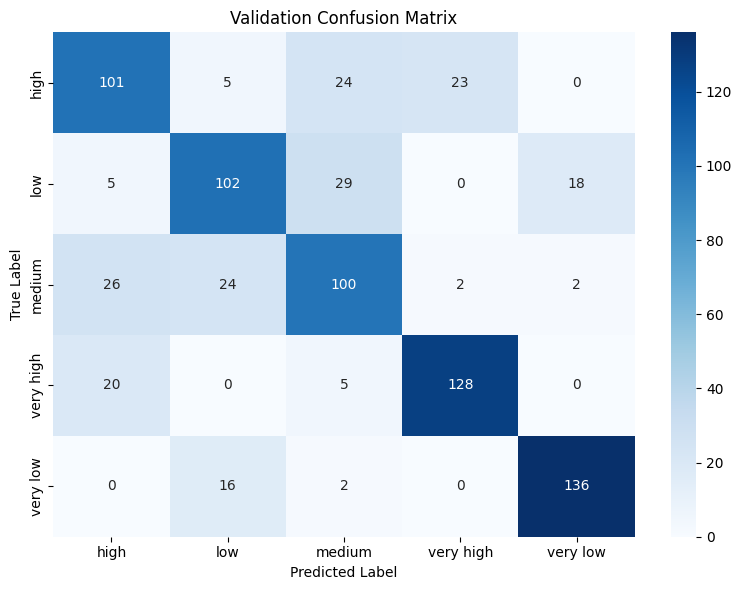

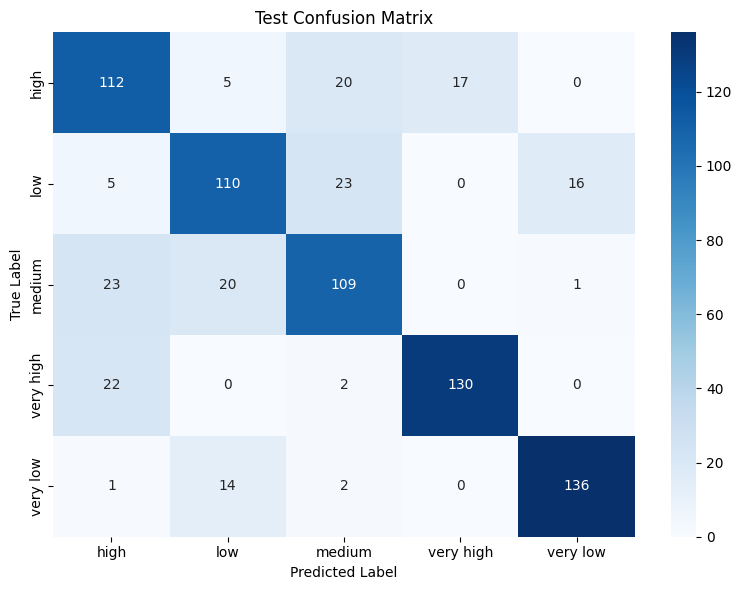

In [13]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(val_conf_matrix, 'Validation Confusion Matrix')
plot_confusion_matrix(test_conf_matrix, 'Test Confusion Matrix')